# Importing Libraries

In [1]:
import os
import zipfile

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download & Explore Dataset

* https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [2]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip


--2021-09-15 18:06:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  66.4MB/s    in 1.0s    

2021-09-15 18:06:54 (66.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
zipref = zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip', 'r')
zipref.extractall('/tmp')
zipref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered/'

train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation/')

print(base_dir, train_dir, validation_dir)

/tmp/cats_and_dogs_filtered/ /tmp/cats_and_dogs_filtered/train/ /tmp/cats_and_dogs_filtered/validation/


In [5]:
!ls /tmp/cats_and_dogs_filtered/train/

cats  dogs


In [6]:
train_cats_dir = os.path.join(train_dir, 'cats/')
train_dogs_dir = os.path.join(train_dir, 'dogs/')

validation_cats_dir = os.path.join(validation_dir, 'cats/')
validation_dogs_dir = os.path.join(validation_dir, 'dogs/')

In [7]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

print(train_cats_fnames[:5])
print(train_dogs_fnames[:5])
print(validation_cats_fnames[:5])
print(validation_dogs_fnames[:5])

['cat.611.jpg', 'cat.47.jpg', 'cat.387.jpg', 'cat.7.jpg', 'cat.690.jpg']
['dog.88.jpg', 'dog.717.jpg', 'dog.977.jpg', 'dog.959.jpg', 'dog.374.jpg']
['cat.2271.jpg', 'cat.2201.jpg', 'cat.2199.jpg', 'cat.2155.jpg', 'cat.2141.jpg']
['dog.2135.jpg', 'dog.2102.jpg', 'dog.2212.jpg', 'dog.2281.jpg', 'dog.2204.jpg']


In [8]:
print('Total Training cat images: ', len(train_cats_fnames))
print('Total Training dog images: ', len(train_dogs_fnames))
print('Total validation cat images: ', len(validation_cats_fnames))
print('Total validation dog images: ', len(validation_dogs_fnames))

Total Training cat images:  1000
Total Training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500


# Data Augmentation & Create Data Generator

In [9]:
train_data_gen = ImageDataGenerator(rescale=1/255.0,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
validation_data_gen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_data_gen.flow_from_directory(directory=train_dir,
                                                     target_size=(150, 150),
                                                     class_mode='binary',
                                                     batch_size=20)

validation_generator = validation_data_gen.flow_from_directory(directory=validation_dir,
                                                          target_size=(150, 150),
                                                          class_mode='binary',
                                                          batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Download Pretrained Model

* https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-09-15 18:06:57--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  97.4MB/s    in 0.9s    

2021-09-15 18:06:58 (97.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [12]:
local_weight_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(include_top=False,
                                weights=None,
                                input_shape=(150, 150, 3))

pre_trained_model.load_weights(local_weight_file)

# Freezing the layers
for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [13]:
last_layer = pre_trained_model.get_layer('mixed10')
print('Last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

Last layer output shape:  (None, 3, 3, 2048)
KerasTensor(type_spec=TensorSpec(shape=(None, 3, 3, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")


# Build the Model

In [14]:
# Flattent the last output layer
x = tf.keras.layers.Flatten()(last_output)

x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics = ['accuracy']
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [15]:
len(train_generator), len(validation_generator)

(100, 50)

In [ ]:
history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/20
100/100 [==============================] - 57s 251ms/step - loss: 8.0559 - accuracy: 0.8440 - val_loss: 0.2781 - val_accuracy: 0.9590
Epoch 2/20
100/100 [==============================] - 23s 228ms/step - loss: 0.8145 - accuracy: 0.8880 - val_loss: 0.2058 - val_accuracy: 0.9620
Epoch 3/20
100/100 [==============================] - 26s 262ms/step - loss: 0.5647 - accuracy: 0.9010 - val_loss: 0.3209 - val_accuracy: 0.9360
Epoch 4/20
100/100 [==============================] - 23s 226ms/step - loss: 0.4112 - accuracy: 0.9135 - val_loss: 0.1524 - val_accuracy: 0.9590
Epoch 5/20
100/100 [==============================] - 24s 239ms/step - loss: 0.4889 - accuracy: 0.9015 - val_loss: 0.4153 - val_accuracy: 0.9070
Epoch 6/20
100/100 [==============================] - 23s 228ms/step - loss: 0.3745 - accuracy: 0.9130 - val_loss: 0.1680 - val_accuracy: 0.9560
Epoch 7/20
100/100 [==============================] - 24s 237ms/step - loss: 0.3527 - accuracy: 0.9110 - val_loss: 0.2309 - val_ac

In [19]:
model.evaluate(validation_generator)

50/50 [==============================] - 7s 141ms/step - loss: 0.1804 - accuracy: 0.9610


[0.18044891953468323, 0.9610000252723694]

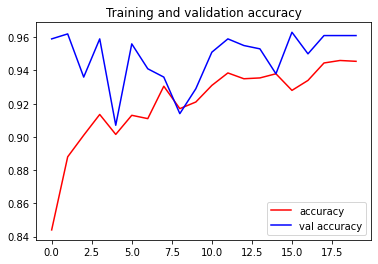

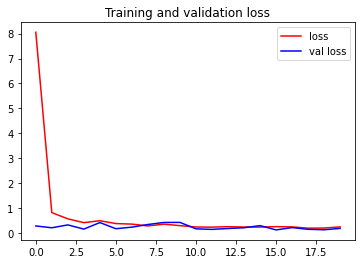

In [18]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc , 'r', label='accuracy')
plt.plot  ( epochs, val_acc , 'b', label='val accuracy')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , 'r', label='loss')
plt.plot  ( epochs, val_loss , 'b', label='val loss')
plt.title ('Training and validation loss'   )
plt.legend()